In [2]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import io
from sklearn.linear_model import Perceptron
%matplotlib inline
from google.colab import files

data = pd.read_csv('/letters.data', header=None)
#data.tail()

X = data.iloc[[0, 1, 3, 10, 16, 17, 18, 21, 22, 23], 0:35].values

print(f"wartosci X: \n{X}")
print("Wymiary tablicy X:", X.shape)
print("Rozmiar tablicy X:", X.size)


wartosci X: 
[[-1  1  1  1 -1  1 -1 -1 -1  1  1 -1 -1 -1  1  1  1  1  1  1  1 -1 -1 -1
   1  1 -1 -1 -1  1  1 -1 -1 -1  1]
 [ 1  1  1  1 -1  1 -1 -1 -1  1  1 -1 -1 -1  1  1  1  1  1 -1  1 -1 -1 -1
   1  1 -1 -1 -1  1  1  1  1  1 -1]
 [ 1  1  1  1 -1  1 -1 -1 -1  1  1 -1 -1 -1  1  1 -1 -1 -1  1  1 -1 -1 -1
   1  1 -1 -1 -1  1  1  1  1  1 -1]
 [ 1 -1 -1 -1  1  1 -1 -1  1 -1  1 -1  1 -1 -1  1  1 -1 -1 -1  1 -1  1 -1
  -1  1 -1 -1  1 -1  1 -1 -1 -1  1]
 [-1  1  1  1 -1  1 -1 -1 -1  1  1 -1 -1 -1  1  1 -1 -1 -1  1  1 -1  1 -1
   1  1 -1 -1  1  1 -1  1  1  1  1]
 [ 1  1  1  1 -1  1 -1 -1 -1  1  1 -1 -1 -1  1  1  1  1  1 -1  1 -1  1 -1
  -1  1 -1 -1  1 -1  1 -1 -1 -1  1]
 [-1  1  1  1 -1  1 -1 -1 -1  1  1 -1 -1 -1 -1 -1  1  1  1 -1 -1 -1 -1 -1
   1  1 -1 -1 -1  1 -1  1  1  1 -1]
 [ 1 -1 -1 -1  1  1 -1 -1 -1  1  1 -1 -1 -1  1  1 -1 -1 -1  1  1 -1 -1 -1
   1 -1  1 -1  1 -1 -1 -1  1 -1 -1]
 [ 1 -1 -1 -1  1  1 -1 -1 -1  1  1 -1 -1 -1  1  1 -1 -1 -1  1  1 -1  1 -1
   1  1 -1  1 -1  1 -1  1 -1  1 -

In [3]:
y = np.zeros((10, 10))
for i in range(10):
    for j in range(10):
        if i==j:
            y[i, j] = 1
        else:
            y[i, j] = -1

y = y.astype(np.int64)
print(f"wartosci y: \n{y}")
print("Wymiary tablicy y:", y.shape)
print("Rozmiar tablicy y:", y.size)


wartosci y: 
[[ 1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
 [-1  1 -1 -1 -1 -1 -1 -1 -1 -1]
 [-1 -1  1 -1 -1 -1 -1 -1 -1 -1]
 [-1 -1 -1  1 -1 -1 -1 -1 -1 -1]
 [-1 -1 -1 -1  1 -1 -1 -1 -1 -1]
 [-1 -1 -1 -1 -1  1 -1 -1 -1 -1]
 [-1 -1 -1 -1 -1 -1  1 -1 -1 -1]
 [-1 -1 -1 -1 -1 -1 -1  1 -1 -1]
 [-1 -1 -1 -1 -1 -1 -1 -1  1 -1]
 [-1 -1 -1 -1 -1 -1 -1 -1 -1  1]]
Wymiary tablicy y: (10, 10)
Rozmiar tablicy y: 100


In [6]:
class SLP(object):
    def __init__(self, eta=0.05, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.w_ = None
        self.ppns = []
        self.random_state = None

    def fit(self, X, y):
        for i in range(10):
            ppn = Perceptron(eta0=self.eta, max_iter=self.n_iter, random_state=self.random_state)
            self.ppns.append(ppn) 
        for j in range(10):
            self.ppns[j].fit(X, y[j])

    def predict(self, X):
        predictions = []
        for i in range(len(self.ppns)):
            predictions.append(self.ppns[i].predict(X))
        return predictions

    def misclassified(self, X, y):
        errors = 0
        predictions = self.predict(X)
        predictions = np.array(predictions) 
        for i in range(10):
            for j in range(10):
                if predictions[i, j] != y[i, j]:
                    errors += 1
        return errors
        
        
    def show(self, X):
        fig, axs = plt.subplots(2, 5)
        iter = 0
        for i in X:
            letter = np.reshape(i,(7,5))
            axs[iter // 5][iter % 5].imshow(letter, cmap='binary', vmin=0, vmax=1)
            iter += 1
        plt.tight_layout()
        plt.show()

net = SLP()

In [7]:
net.fit(X, y)

In [ ]:
net.predict(X)

[array([ 1, -1, -1, -1, -1, -1, -1, -1, -1, -1]),
 array([-1,  1, -1, -1, -1, -1, -1, -1, -1, -1]),
 array([-1, -1,  1, -1, -1, -1, -1, -1, -1, -1]),
 array([-1, -1, -1,  1, -1, -1, -1, -1, -1, -1]),
 array([-1, -1, -1, -1,  1, -1, -1, -1, -1, -1]),
 array([-1, -1, -1, -1, -1,  1, -1, -1, -1, -1]),
 array([-1, -1, -1, -1, -1, -1,  1, -1, -1, -1]),
 array([-1, -1, -1, -1, -1, -1, -1,  1, -1, -1]),
 array([-1, -1, -1, -1, -1, -1, -1, -1,  1, -1]),
 array([-1, -1, -1, -1, -1, -1, -1, -1, -1,  1])]

In [8]:
net.misclassified(X,y)

0

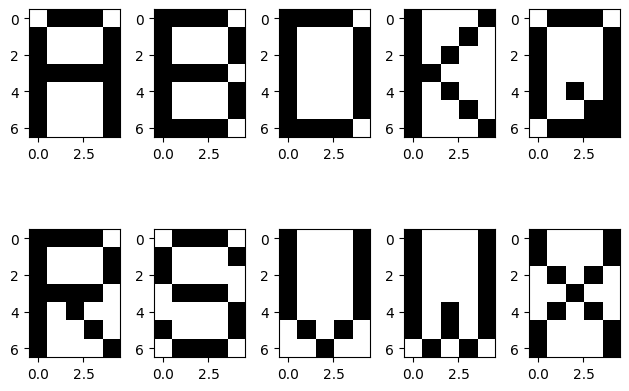

In [9]:
net.show(X)

In [10]:
def damage(X, percent, seed=1):
        rgen = np.random.RandomState(seed)
        result = np.array( X )
        count = int(X.shape[1]*percent/100)

        for indeks_example in range( len(X) ):
            order = np.sort(rgen.choice(X.shape[1], count, replace=False))
            for indeks_pixel in order:
                result[indeks_example][indeks_pixel] *= -1
        return result

damaged5 = damage(X,5)
damaged15 = damage(X,15)
damaged40 = damage(X,40)

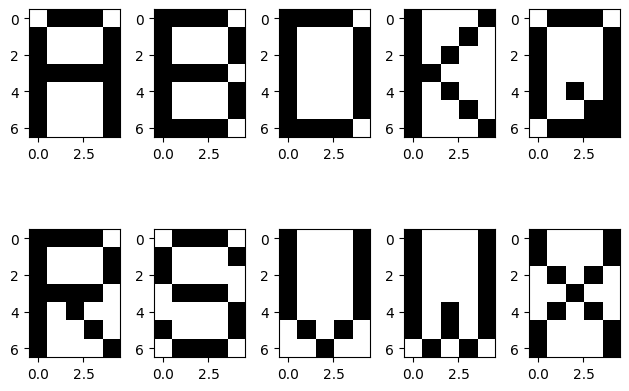

In [11]:
net.show(X)

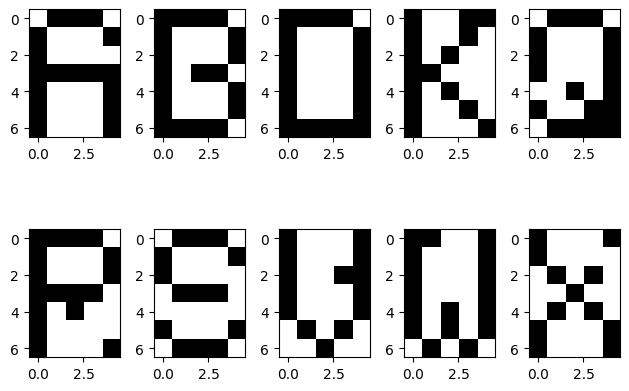

In [12]:
net.show(damaged5)

In [18]:
net.predict(damaged5)

[array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1]),
 array([-1,  1, -1, -1, -1, -1, -1, -1, -1, -1]),
 array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1]),
 array([-1, -1, -1,  1, -1, -1, -1, -1, -1, -1]),
 array([-1, -1, -1, -1,  1, -1, -1, -1, -1, -1]),
 array([-1, -1, -1, -1, -1,  1, -1, -1, -1, -1]),
 array([-1, -1, -1, -1, -1, -1,  1, -1, -1,  1]),
 array([-1, -1, -1, -1, -1, -1, -1,  1, -1, -1]),
 array([-1, -1, -1, -1, -1, -1, -1, -1,  1, -1]),
 array([-1, -1, -1, -1, -1, -1, -1, -1, -1,  1])]

In [13]:
net.misclassified(damaged5, y)

3

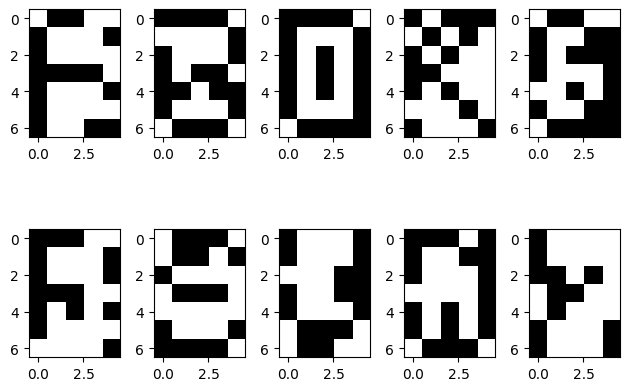

In [21]:
net.show(damaged15)

In [19]:
net.predict(damaged15)

[array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1]),
 array([-1,  1, -1, -1, -1, -1,  1,  1, -1, -1]),
 array([-1, -1, -1,  1, -1, -1, -1, -1, -1, -1]),
 array([-1, -1, -1,  1, -1, -1, -1, -1, -1, -1]),
 array([-1, -1,  1,  1,  1, -1, -1, -1, -1, -1]),
 array([-1, -1, -1,  1, -1, -1,  1, -1, -1, -1]),
 array([-1,  1, -1, -1, -1, -1,  1, -1, -1,  1]),
 array([-1, -1, -1, -1, -1, -1, -1,  1, -1, -1]),
 array([-1, -1, -1, -1, -1, -1, -1, -1,  1, -1]),
 array([-1, -1, -1, -1, -1, -1,  1, -1, -1,  1])]

In [22]:
net.misclassified(damaged15, y)

13

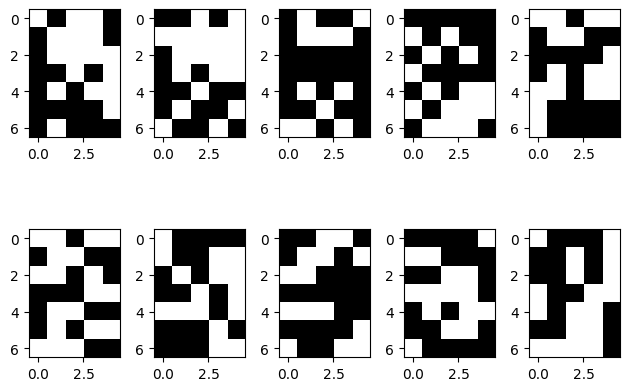

In [16]:
net.show(damaged40)

In [20]:
net.predict(damaged40)

[array([-1, -1, -1,  1, -1, -1,  1, -1, -1, -1]),
 array([-1, -1, -1,  1, -1, -1,  1,  1, -1, -1]),
 array([-1, -1, -1,  1, -1, -1,  1, -1,  1, -1]),
 array([-1, -1, -1, -1,  1, -1,  1,  1, -1, -1]),
 array([-1, -1, -1, -1,  1, -1,  1, -1,  1, -1]),
 array([-1, -1, -1,  1, -1, -1,  1,  1, -1, -1]),
 array([-1, -1, -1, -1,  1, -1,  1, -1,  1,  1]),
 array([-1, -1, -1, -1,  1, -1,  1,  1, -1, -1]),
 array([-1, -1, -1, -1, -1, -1,  1,  1, -1, -1]),
 array([-1, -1, -1, -1, -1, -1, -1, -1, -1,  1])]

In [17]:
net.misclassified(damaged40, y)

29